In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
datafile = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_1000.csv'
df = pd.read_csv(datafile)
domainSize = 61*61
df['Objective in NumPixels'] = df.apply(lambda row: math.sqrt(row.Objective * domainSize * domainSize), axis=1)
meanPerTimeStep = df.groupby('Focus Timestep').mean()

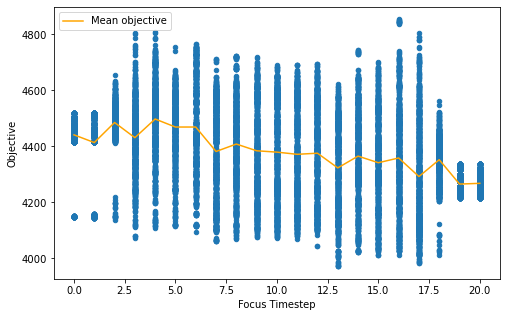

In [3]:
fig, ax = plt.subplots(figsize=(8,5))
df.plot.scatter(x='Focus Timestep', y='Objective in NumPixels', ax=ax)
meanPerTimeStep.plot.line(y='Objective in NumPixels', ax=ax, color='orange')
#ax.set_ylim(0,5000)
ax.set_ylabel("Objective");
ax.legend(["Mean objective"]);

In [4]:
print(df[df.Objective == df.Objective.max()])

       Objective  Focus Timestep   Seed  Objective in NumPixels
16766   1.701287            16.0  766.0             4853.426937


In [5]:
print(df[df.Objective == df.Objective.min()])

       Objective  Focus Timestep   Seed  Objective in NumPixels
13473   1.139213            13.0  473.0             3971.568744


In [6]:
meanPerTimeStep = meanPerTimeStep.drop('Seed',axis='columns')

In [7]:
datafileMean = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_1000_mean.csv'
meanPerTimeStep.to_csv(datafileMean, index=True)

In [8]:
datafilePixels = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_1000_inPixels.csv'
df.to_csv(datafilePixels, index=False)